In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/customer_support_tickets.csv')

In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

# Data Understanding & Cleaning

In [5]:
df.shape

(8469, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [7]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [8]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [9]:
# Drop 2 columns because he has containe approx 70% null values and drop unnecessary columns
df = df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Description', 'Resolution', 'Time to Resolution', 'Ticket Priority','Ticket Type','Ticket Channel', 'Ticket Status'], axis = 1)

In [10]:
# Drop all null rows in Customer Satisfaction Rating
df = df[df['Customer Satisfaction Rating'].notnull()]

In [11]:
df.duplicated().sum()

0

# Feature Engineering

In [12]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])

In [13]:
# Feature Engineering – Days Since Purchase
today = pd.Timestamp.today()

df['Days_Since_Purchase'] = (today - df['Date of Purchase']).dt.days

# Drop original date columns
df.drop(columns=['Date of Purchase', 'First Response Time'], inplace=True)

In [14]:
# Categorize satisfaction rating
def categorize(rating):
    if rating <= 2:
        return 'Low'
    elif rating == 3:
        return 'Medium'
    else:
        return 'High'


# Apply to data
df['Satisfaction_Level'] = df['Customer Satisfaction Rating'].apply(categorize)


In [15]:
df

,Customer Age,Customer Gender,Product Purchased,Ticket Subject,Customer Satisfaction Rating,Days_Since_Purchase,Satisfaction_Level
2,48,Other,Dell XPS,Network problem,3.0,1851,Medium
3,27,Female,Microsoft Office,Account access,3.0,1729,Medium
4,67,Female,Autodesk AutoCAD,Data loss,1.0,2012,Low
10,48,Male,Nintendo Switch,Data loss,1.0,1662,Low
11,51,Male,Microsoft Xbox Controller,Software bug,1.0,1384,Low
...,...,...,...,...,...,...,...
8452,62,Female,MacBook Pro,Display issue,3.0,1958,Medium
8453,61,Other,iPhone,Peripheral compatibility,5.0,1875,High
8455,54,Other,Dyson Vacuum Cleaner,Refund request,1.0,1648,Low
8466,57,Female,GoPro Action Camera,Account access,3.0,1452,Medium


In [16]:
df.to_csv('pipline.csv')

# Visualization

<Axes: xlabel='Customer Satisfaction Rating', ylabel='Product Purchased'>

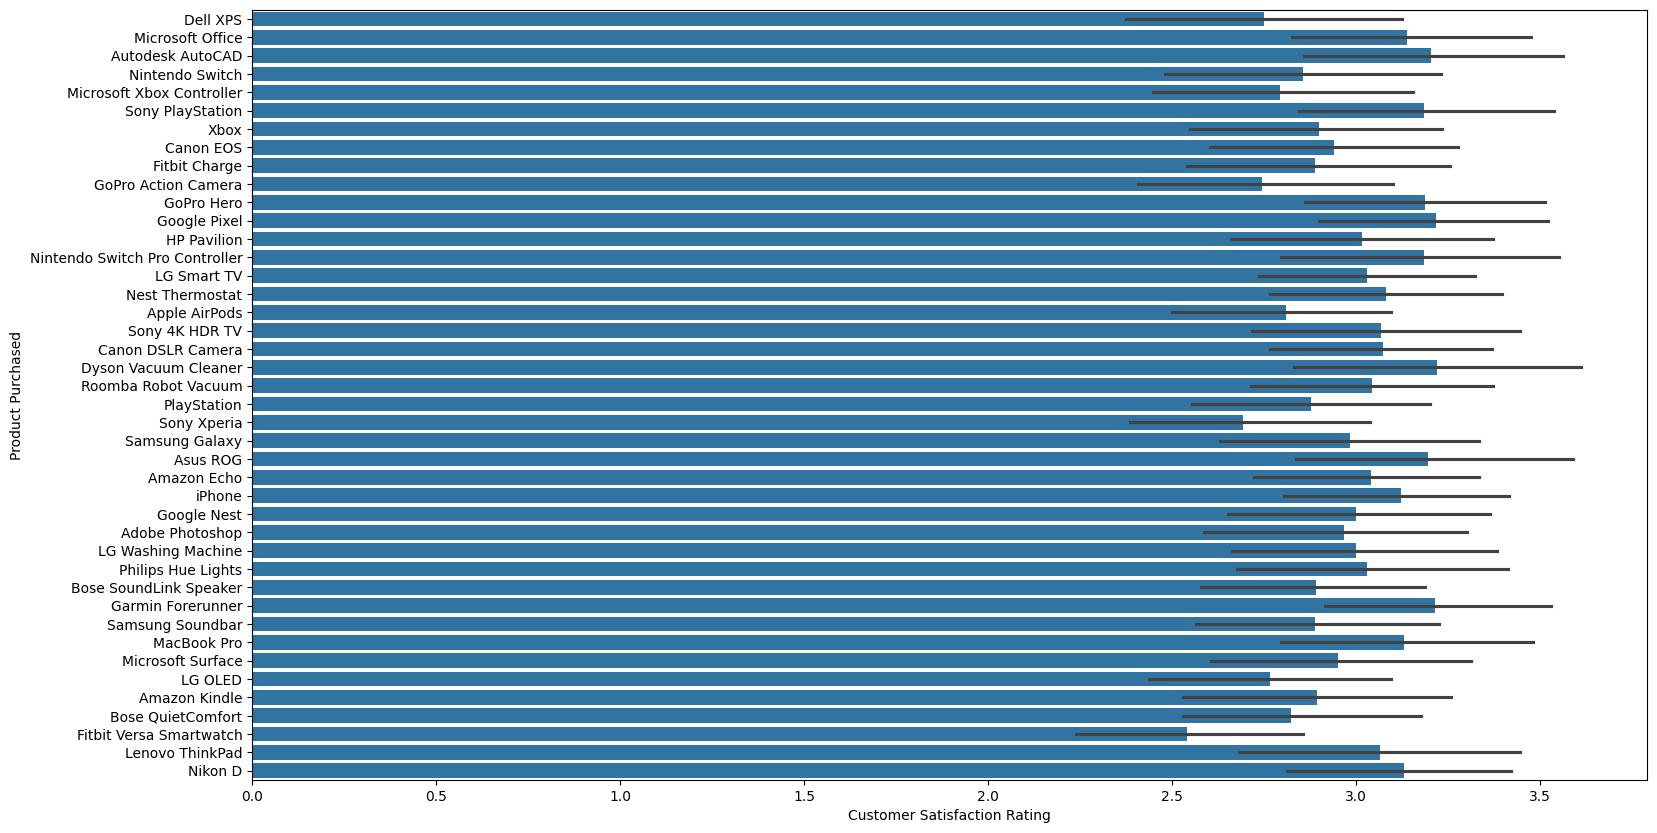

In [17]:
plt.figure(figsize = (18, 10))
sns.barplot(x  = 'Customer Satisfaction Rating',
                y = 'Product Purchased', 
                data = df)

<Axes: xlabel='Customer Gender', ylabel='Customer Satisfaction Rating'>

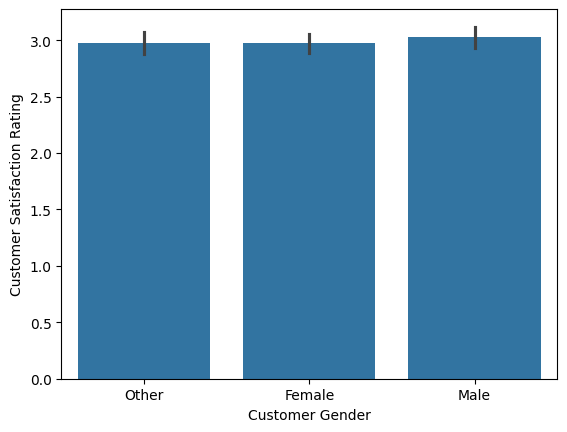

In [18]:
sns.barplot(x = 'Customer Gender',
             y = 'Customer Satisfaction Rating',
            data  = df)

<Axes: xlabel='Satisfaction_Level', ylabel='Days_Since_Purchase'>

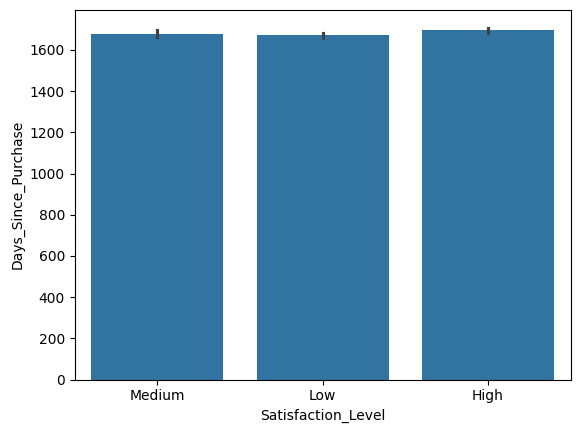

In [19]:
sns.barplot(x = 'Satisfaction_Level',
             y = 'Days_Since_Purchase',
            data  = df)

<Axes: xlabel='Customer Age', ylabel='Customer Satisfaction Rating'>

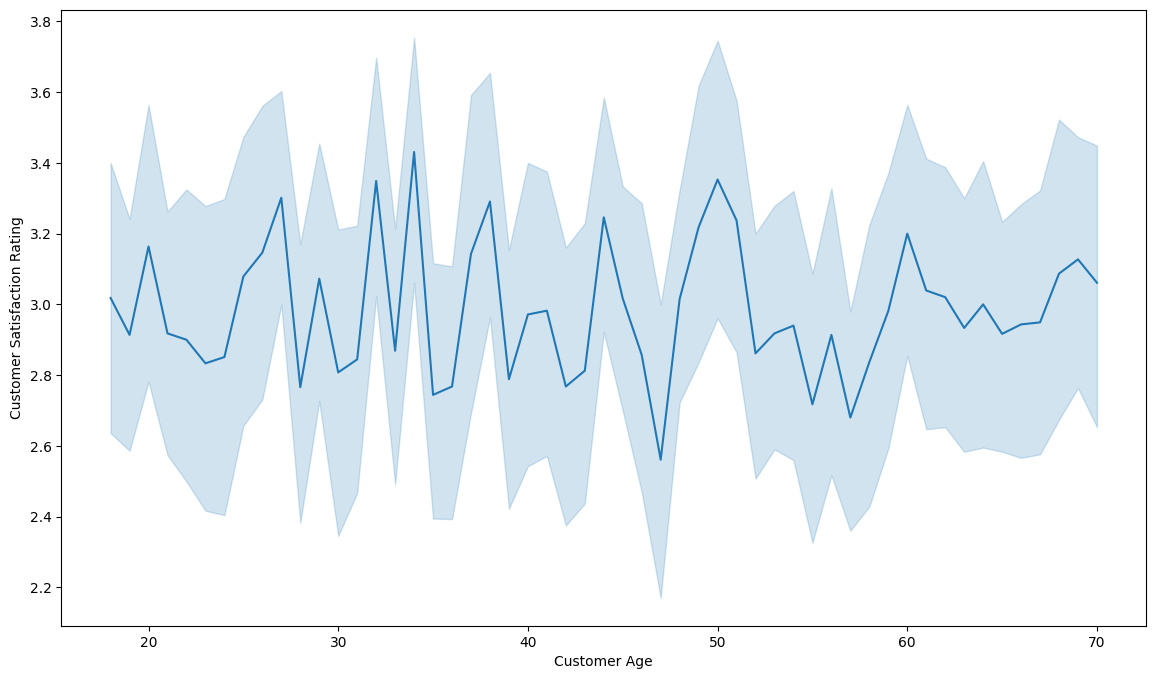

In [23]:
plt.figure(figsize=(14, 8))
sns.lineplot(x = 'Customer Age',
             y = 'Customer Satisfaction Rating',
            data  = df)

<Axes: xlabel='count', ylabel='Satisfaction_Level'>

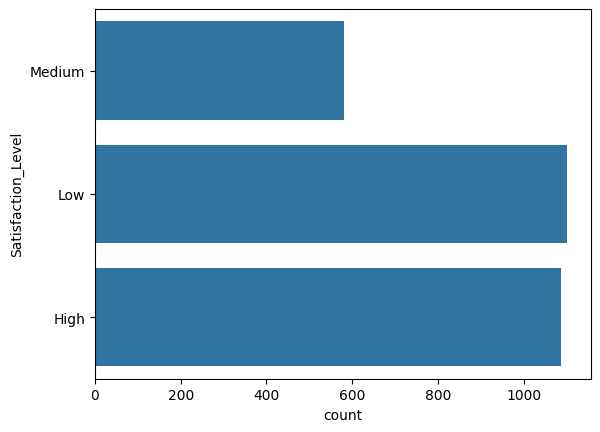

In [24]:
sns.countplot(df['Satisfaction_Level'])

# scaling

In [ ]:
num_col = df.select_dtypes(['int', 'float'])
num_col = num_col.drop(['Customer Satisfaction Rating'], axis = 1)
target_col = df['Customer Satisfaction Rating']

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = scaler.fit_transform(num_col)
num_df = pd.DataFrame(num_col, columns = ['Customer Age', 'Days_Since_Purchase'])

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = pd.DataFrame()
cat_col = df.select_dtypes('object')
cat_col = df.drop(['Customer Age', 'Days_Since_Purchase', 'Customer Satisfaction Rating'], axis = 1)

for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = df[col]

# Reset index

In [ ]:
num_df =  num_df.reset_index(drop = True)
label_encoders =   label_encoders.reset_index(drop = True)
target_col =-   target_col.reset_index(drop = True)

# Concate all data frames

In [ ]:
final_df = pd.concat([num_df, label_encoders, target_col], axis = 1)

In [ ]:
final_df

,Customer Age,Days_Since_Purchase,Customer Gender,Product Purchased,Ticket Subject,Satisfaction_Level,Customer Satisfaction Rating
0,0.241319,0.793096,2,10,8,2,-3.0
1,-1.140919,0.216145,0,25,0,2,-3.0
2,1.491916,1.554482,0,5,3,1,-1.0
3,0.241319,-0.100705,1,30,3,1,-1.0
4,0.438782,-1.415396,1,27,15,1,-1.0
...,...,...,...,...,...,...,...
2764,1.162812,1.299110,0,24,5,2,-3.0
2765,1.096991,0.906594,2,41,10,0,-5.0
2766,0.636245,-0.166912,2,11,14,1,-1.0
2767,0.833707,-1.093817,0,15,0,2,-3.0


In [ ]:
# Save the data set 

final_df.to_csv('clean_data.csv')